In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sf 
pi = np.pi

In [6]:
def Transmission(V, Vpi):
    return np.cos(V/Vpi*np.pi/2-pi/2)**2


def dBm_to_Vpp(P, Z=50):
    return np.sqrt(10**(P/10)*1e-3*Z*2)*2


def rf(t, nu, P, Z=50):
    return dBm_to_Vpp(P,Z)*np.cos(2*np.pi*nu*t)


def fourier(t, f):
    # f = [0, 1, ...,   n/2-1,     -n/2, ..., -1] / (d*n)   if n is even
    # f = [0, 1, ..., (n-1)/2, -(n-1)/2, ..., -1] / (d*n)   if n is odd
    FT = np.fft.fft(f)
    nus = np.fft.fftfreq(len(t), t[1]-t[0])
    nus = np.fft.fftshift(nus)
    FT = np.fft.fftshift(FT)
    return nus, FT


def get_idx(arr, val):
    return np.argmin(np.abs(arr-val))

Vsetpoint = 0
P0 = 8
Vpi = 2
V = np.linspace(-2*Vpi, 2*Vpi, 1e2)

nu_rf = 3e9
tres = 1e-12
t = np.arange(0, 1e-7, tres)

Vbias = Vsetpoint+rf(t, nu_rf, P0)
T = Transmission(Vbias, Vpi)
plt.show()

C:\Program Files (x86)\Python36\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


In [24]:
Vpi = 3.5
Z = 50
Vpp = dBm_to_Vpp(30)
Vp = Vpp/2
I = Vp/Z
mu0 = 4*pi*1e-7
R = 50e-6
muB = 28e9


70.37167544041137

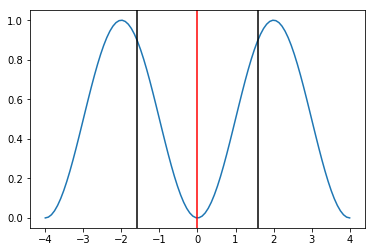

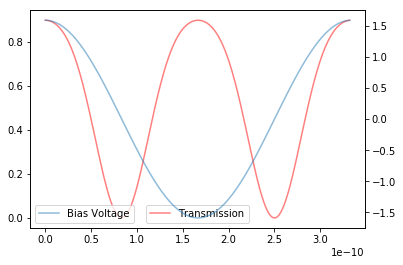

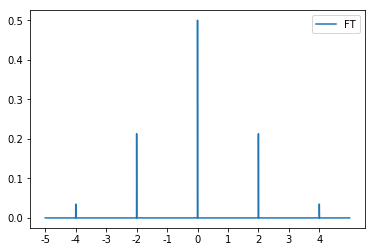

In [9]:
plt.plot(V, Transmission(V, Vpi))
plt.axvline(min(Vbias), color='k')
plt.axvline(Vsetpoint, color='r')
plt.axvline(max(Vbias), color='k')
plt.show()

t_min = 0
t_max = 1/nu_rf
plt.plot(t[np.argmin(np.abs(t-t_min)):np.argmin(np.abs(t-t_max))], T[np.argmin(np.abs(t-t_min)):np.argmin(np.abs(t-t_max))], '-r', alpha=0.5, label='Transmission')
plt.legend()
plt.twinx().plot(t[np.argmin(np.abs(t-t_min)):np.argmin(np.abs(t-t_max))], Vbias[np.argmin(np.abs(t-t_min)):np.argmin(np.abs(t-t_max))], alpha=0.5, label='Bias Voltage')
plt.legend()
plt.xlabel("Time in s")
plt.show()

nus, FT = fourier(t, T)
nu_min = -5*nu_rf
nu_max = 5*nu_rf
plt.plot(
        nus[np.argmin(np.abs(nus-nu_min)):np.argmin(np.abs(nus-nu_max))], 
        np.abs(FT[np.argmin(np.abs(nus-nu_min)):np.argmin(np.abs(nus-nu_max))])/np.sum(np.abs(FT)), 
        label='FT')
plt.xticks(np.arange(-5,5,1)*nu_rf, np.arange(-5,5,1))
plt.legend()
plt.show()

In [ ]:
Vsetpoints = np.arange(0, Vpi, 0.1)
rf_Powers = np.arange(0,20,0.1)
spectr = []
for rf_Power in rf_Powers:
    for Vsetpoint in Vsetpoints:
        
        Vbias = Vsetpoint+rf(t, nu_rf, rf_Power)
        T = Transmission(Vbias, Vpi)
        nus, FT = fourier(t, T)
        FT = FT/np.sum(np.abs(FT))

        spectr.append([
                        np.abs(FT[get_idx(nus, 0*nu_rf)]), 
                        np.abs(FT[get_idx(nus, 1*nu_rf)])/np.abs(FT[get_idx(nus, 0*nu_rf)]), 
                        np.abs(FT[get_idx(nus, 2*nu_rf)])/np.abs(FT[get_idx(nus, 0*nu_rf)]), 
                        np.abs(FT[get_idx(nus, 3*nu_rf)])/np.abs(FT[get_idx(nus, 0*nu_rf)]), 
                        np.abs(FT[get_idx(nus, 4*nu_rf)])/np.abs(FT[get_idx(nus, 0*nu_rf)])
                        ]
            )

In [ ]:
spectr = np.array(spectr)
spectr = spectr.reshape(len(rf_Powers),len(Vsetpoints),5)

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# X, Y = np.meshgrid(rf_Powers, Vsetpoints)
# ax.plot_surface(X, Y, spectr[:,:,1].T, color='b', alpha=0.5)
# ax.set_xticks(np.arange(min(rf_Powers), max(rf_Powers), (max(rf_Powers) - min(rf_Powers))//6) )
# ax.set_yticks(np.arange(0, Vpi, 0.5))
# ax.view_init(elev=30, azim=30)
# plt.show()

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# X, Y = np.meshgrid(rf_Powers, Vsetpoints)
# ax.plot_surface(X, Y, spectr[:,:,2].T, color='r', alpha=0.5)
# ax.set_xticks(np.arange(min(rf_Powers), max(rf_Powers), (max(rf_Powers) - min(rf_Powers))//6) )
# ax.set_yticks(np.arange(0, Vpi, 0.5))
# ax.view_init(elev=30, azim=30)
# plt.show()

plt.pcolor(X, Y, spectr[:,:,0].T)
plt.colorbar()
plt.show()

plt.pcolor(X, Y, spectr[:,:,1].T)
plt.colorbar()
plt.show()

plt.pcolor(X, Y, spectr[:,:,2].T)
plt.colorbar()
plt.show()

plt.pcolor(X, Y, spectr[:,:,3].T)
plt.colorbar()
plt.show()

plt.pcolor(X, Y, spectr[:,:,4].T)
plt.colorbar()
plt.show()

In [ ]:
np.amax(spectr[:,:,2])
np.argmax(spectr[:,:,2])

In [ ]:
argmax = np.unravel_index(np.argmax(spectr[:,:,2]), (len(rf_Powers), len(Vsetpoints)))
print(f"Maximum 2nd harmonic with dominance {np.amax(spectr[:,:,2])} at {rf_Powers[argmax[0]]}dB and {Vsetpoints[argmax[1]]}V setpoint")
print(f"Presence of 0st harmonic {round(100*spectr[argmax[0], argmax[1], 0],2)}")
print(f"Presence of 1st harmonic {round(100*spectr[argmax[0], argmax[1], 0]*spectr[argmax[0], argmax[1], 1],2)}")
print(f"Presence of 2nd harmonic {round(100*spectr[argmax[0], argmax[1], 0]*spectr[argmax[0], argmax[1], 2],2)}")
print(f"Presence of 3rd harmonic {round(100*spectr[argmax[0], argmax[1], 0]*spectr[argmax[0], argmax[1], 3],2)}")
print(f"Presence of 4th harmonic {round(100*spectr[argmax[0], argmax[1], 0]*spectr[argmax[0], argmax[1], 4],2)}")


In [ ]:
Vsetpoint = 2
Vbias = Vsetpoint+rf(t, nu_rf, 8)
T = Transmission(Vbias, Vpi)
nus, FT = fourier(t, T)

plt.plot(V, Transmission(V, Vpi))
plt.axvline(min(Vbias), color='k')
plt.axvline(Vsetpoint, color='r')
plt.axvline(max(Vbias), color='k')
plt.show()

t_min = 0
t_max = 1/nu_rf
plt.plot(t[np.argmin(np.abs(t-t_min)):np.argmin(np.abs(t-t_max))], T[np.argmin(np.abs(t-t_min)):np.argmin(np.abs(t-t_max))], '-r', alpha=0.5, label='Transmission')
plt.legend()
plt.twinx().plot(t[np.argmin(np.abs(t-t_min)):np.argmin(np.abs(t-t_max))], Vbias[np.argmin(np.abs(t-t_min)):np.argmin(np.abs(t-t_max))], alpha=0.5, label='Bias Voltage')
plt.legend()
plt.show()

nus, FT = fourier(t, T)
nu_min = -10*nu_rf
nu_max = 10*nu_rf
plt.plot(
        nus[np.argmin(np.abs(nus-nu_min)):np.argmin(np.abs(nus-nu_max))], 
        np.abs(FT[np.argmin(np.abs(nus-nu_min)):np.argmin(np.abs(nus-nu_max))])/np.sum(np.abs(FT)), 
        label='FT')
plt.xticks(np.arange(-5,5,1)*nu_rf, np.arange(-5,5,1))
plt.legend()
plt.show()

In [ ]:
spectr[(1,1),2]